<a href="https://colab.research.google.com/github/SDS-AAU/M2-2019/blob/master/notebooks/Newspaper_NER_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install newspaper3k

     |████████████████████████████████| 215kB 4.6MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 7.4MB 12.7MB/s 
     |████████████████████████████████| 194kB 30.0MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp36-none-any.whl size=13538 sha256=4acf03dc729f5646a5bb8a55ba529df2c5308d233beb881080ccf97f6824ff77
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398407 sha256=c9174f2b662899ff4fcbd39f771eb48d3509ae337d7d66879292223b45e1a866
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=7a0f891123447e17e9480f0451f38ebd49a131a3792644c02f9281fb20f87b7e
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32

In [0]:
!pip install newsapi-python

  Created wheel for newsapi-python: filename=newsapi_python-0.2.5-py2.py3-none-any.whl size=6593 sha256=4dcc504a2ee7ba840b0faec69bce76f46c3a052d73ede0bda6840673ac054095
  Stored in directory: /root/.cache/pip/wheels/d8/dc/5e/857ef20410a023cfe728ac6f360958df44b199b459cbc6ccbc
Successfully built newsapi-python


In [0]:
from newsapi import NewsApiClient

In [0]:
from newspaper import Article

In [0]:
import spacy

In [0]:
import networkx as nx

In [0]:
import itertools

In [0]:
import matplotlib.pyplot as plt

In [0]:
nlp = spacy.load("en")

In [0]:
newsapi = NewsApiClient(api_key='XXXX')

In [0]:
news_search = newsapi.get_everything(q='trump',
                                      #sources='bbc-news,the-verge',
                                      #domains='bbc.co.uk,techcrunch.com',
                                      from_param='2019-10-01',
                                      to='2019-10-10',
                                      language='en',
                                      sort_by='relevancy',
                                      #page=1
                                    )

In [0]:
url_list = [a['url'] for a in news_search['articles']]

In [0]:
news_corpus = []
for url in url_list:
  
  article = Article(url)
  article.download()
  article.parse()
  news_corpus.append(article)

In [0]:
news_corpus_texts = [result.text for result in news_corpus]

In [0]:
news_corpus_texts = [result for result in news_corpus_texts if 'Chat with us' not in result]

In [0]:
spacy_texts = [text for text in nlp.pipe(news_corpus_texts)]

In [0]:
ents_from_sents = []

for text in spacy_texts:
  for sentance in text.sents:
    
    sentance_entities = [ent.text for ent in sentance.ents if ent.label_ == 'PERSON']
    sentance_entities = list(set(sentance_entities))
    
    if len(sentance_entities) > 1:
      ents_from_sents.append(sentance_entities)

In [0]:
G = nx.Graph()

In [0]:
# Create the graph
for i in ents_from_sents:
  G.add_edges_from(list(itertools.combinations(i,2)))

In [0]:
# Calculate degre-centrality and assign it as a node-attribute
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree')

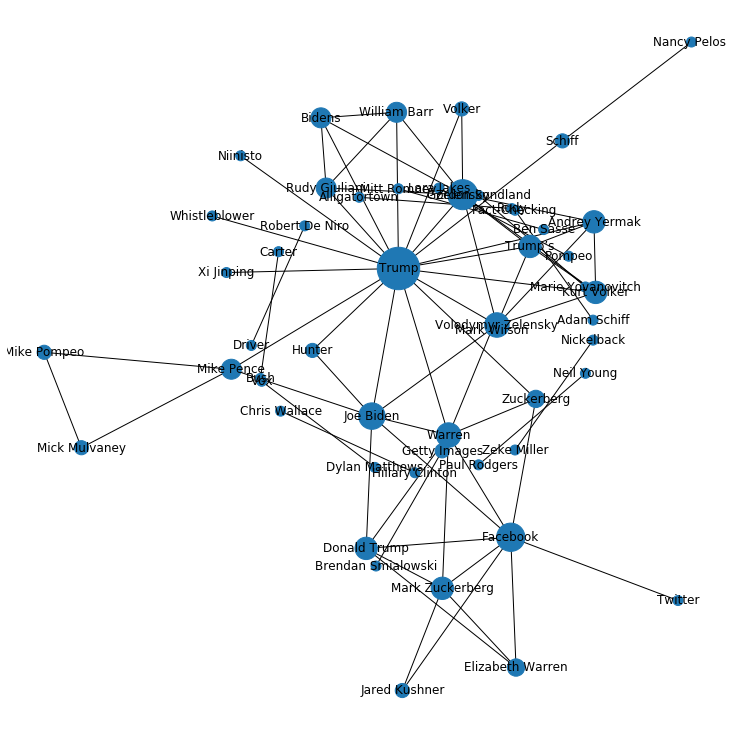

In [0]:
plt.figure(figsize=(10,10)) 
nx.draw_kamada_kawai(G, with_labels = True, node_size=[v * 100 for v in dict(G.degree).values()])